# William Chiu Showcase

Hi my name is William Chiu, I'm a 2A Software Engineering student.  I’m interested in joining WAT.ai because I want to move beyond simple CRUD work and take on projects that demand real problem-solving and critical thinking. While I’ve studied ML and deep learning theory, I’ve struggled with translating that knowledge into implementation. By working on real-world projects at WAT.ai, I hope to bridge that gap while learning from other more experienced engineers.

In [30]:
%pip install ipykernel jupyter matplotlib pillow scikit-learn kagglehub pandas

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# First Step: Import Images for testing

using images taken from the internet of a pikachu and charizard pokemon card

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

PikachuCard = Image.open("images/test/PikachuCard.jpg")
CharizardCard = Image.open("images/test/CharizardCard.jpg")


# Displaying images

displaying what the cards look like 

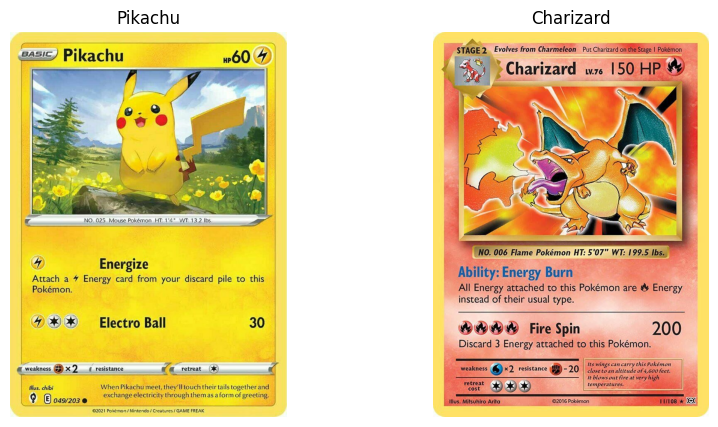

In [ ]:

#display images before applying transformation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) 
plt.imshow(PikachuCard)
plt.axis("off")
plt.title("Pikachu")

plt.subplot(1,2,2)
plt.imshow(CharizardCard)
plt.axis("off")
plt.title("Charizard")

plt.show()

# Step 2: training a simple model

I'm going to create a simple Logistic Regression model that can classify the pokemon cards into specific element typings based on their respective average RGB color scheme.  The Logistic Regression is a multiclass classifier with following options: Grass, Fire, Water, Lightning, Psychic, Fighting, Darkness, Metal, Dragon, Fairy, and Colorless

In [26]:
import kagglehub as kh
import pandas as pd
import os

path = kh.dataset_download("priyamchoksi/pokemon-cards")

csv_path = os.path.join(path, "pokemon-cards.csv")
df = pd.read_csv(csv_path)

print(df.head())
print(df.columns)

#need to extract type from text since the kaggle dataset only has the type in a caption 
def extract_type(caption: str) -> str:
    parts = caption.split("type ")
    if len(parts) > 1:
        return parts[1].split()[0] #Since all captions are format ... of type Fire with ..., need to split at type and take only Fire
    return "Unknown"

df["type"] = df["caption"].apply(extract_type)



        id                                       image_url  \
0    pl3-1    https://images.pokemontcg.io/pl3/1_hires.png   
1   ex12-1   https://images.pokemontcg.io/ex12/1_hires.png   
2    xy5-1    https://images.pokemontcg.io/xy5/1_hires.png   
3  mcd19-1  https://images.pokemontcg.io/mcd19/1_hires.png   
4    ex7-1    https://images.pokemontcg.io/ex7/1_hires.png   

                                             caption        name  hp  \
0  A Basic, SP Pokemon Card of type Darkness with...     Absol G  70   
1  A Stage 1 Pokemon Card of type Colorless with ...  Aerodactyl  70   
2  A Basic Pokemon Card of type Grass with the ti...      Weedle  50   
3  A Basic Pokemon Card of type Grass with the ti...    Caterpie  50   
4  A Stage 1 Pokemon Card of type Water with the ...   Azumarill  80   

                     set_name  
0             Supreme Victors  
1                Legend Maker  
2                Primal Clash  
3  McDonald's Collection 2019  
4         Team Rocket Returns  
In

In [29]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO



def extract_rgb_features_from_url(url: str) -> np.ndarray:
    #Download image from URL and return average RGB values.
    try:
        response = requests.get(url, timeout=10) 
        response.raise_for_status()  
        img = Image.open(BytesIO(response.content)).convert("RGB") 
        arr = np.array(img)
        avg_color = arr.mean(axis=(0, 1))[:3]
        return avg_color
    except Exception as e:
        print("Skipping bad image:", url, e)
        return None


def extract_rgb_features(image: Image.Image) -> np.ndarray:
    # This function takes in a image and then returns the average rgb values of the card 
    arr = np.array(image) 
    avg_color = arr.mean(axis=(0, 1))[:3] 
    return avg_color


X, y = [], []
valid_types = [
    "Grass", "Fire", "Water", "Lightning", "Psychic", "Fighting",
    "Darkness", "Metal", "Dragon", "Fairy", "Colorless"
]


for _, row in df.head(200).iterrows():   # limit to 200 cards since dataset is way too large
    features = extract_rgb_features_from_url(row["image_url"])
    if features is not None:
        X.append(features)
        y.append(row["type"] if row["type"] in valid_types else "Colorless") #Setting default to colorless

X = np.array(X)
y = np.array(y)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Train model on 200 Kaggle cards
model = LogisticRegression(solver="saga", max_iter=2000)
model.fit(X, y)

# Test on local cards
X_test = np.array([ extract_rgb_features(PikachuCard), extract_rgb_features(CharizardCard) ])
Y_test = np.array(["Lightning", "Fire"])

predictions = model.predict(X_test)


Model trained on 200 cards.
True: Lightning  → Predicted: Lightning
True: Fire       → Predicted: Fire
Test Accuracy: 1.0


c:\Users\wille\.vscode\WatAI\ai-skill-showcase\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Step 3: Display the Images and their classification

Text(0.5, 1.0, 'Charizard Card Type -> Fire\nConfidence Score: 100.0%')

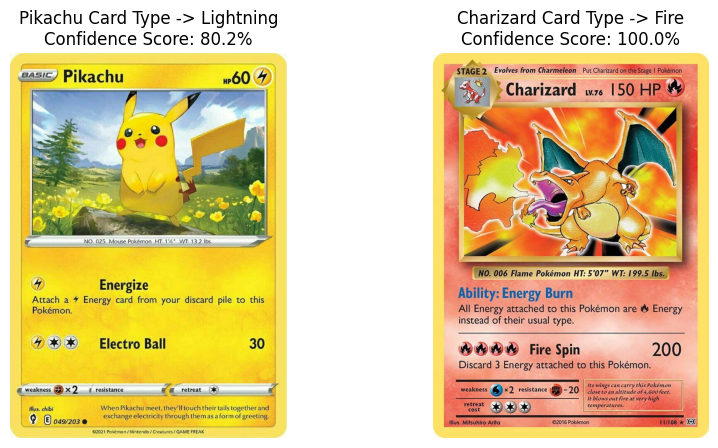

In [ ]:
plt.figure(figsize=(10,5))

Pikachu_conf = np.max(model.predict_proba([X_test[0]])) * 100
Charizard_conf = np.max(model.predict_proba([X_test[1]])) * 100

plt.subplot(1,2,1)
plt.imshow(PikachuCard)
plt.axis("off")
plt.title("Pikachu Card Type -> " + predictions[0] + "\nConfidence Score: " + f"{Pikachu_conf:.1f}%")

plt.subplot(1,2,2)
plt.imshow(CharizardCard)
plt.axis("off")
plt.title("Charizard Card Type -> " + predictions[1] + "\nConfidence Score: " + f"{Charizard_conf:.1f}%")

# Step 4: Summary of Process

The process I followed is as follows: 

1) Get test images (Charizard and Pikachu cards) from directory into code
2) Using kaggle, I pulled a pokemon card dataset that included image urls and descriptions
3) I needed to process the descriptions by parsing the caption field, extracting the pokemon type, and inserting it into a custom column called type on my dataframe
4) Needed to open up the image URLs, find their RGB values, and then return it.  Also needed extra error handling because if the image was not openable, I didn't want my program to get hung (added 10 second max before raising exception)
5) Train model on first 200 rows; limited amount of rows since dataset 13000 rows.  I record each rows image RGB into X_train array and its subsequent type in the respective Y_train array position.
6) Test my model on my test images 😊